# Group 8

Vi Nguyen (13592629)

Bach Nguyen

Ajwad Zaman


## Solving a classification problem
In order to solve a classification problem, the following steps need to be taken:
##### Session 1: Introduction
- Find a suitable dataset -> Define the input dataset
- Explore the input dataset.
- After exploration, it may be needed to pre-process the dataset in real-world classification problems,i.e., to clean and pre-process the input dataset to make it ready for model development. Since we use a toy data set for the study purpose only, no preprecossing is required.

##### Session 2: Training and testing data
- Form the training dataset and test dataset
- Explore the training and testing dataset.

##### Session 3: Decision Tree classifier construction
- Develop a classifier by training a machine learning model using the training dataset
- Evaluate the classifier
- Deploy the classifier to solve the target classification problem (optional)

##### Session 4: Classifier construction
- Confusion Matrix
- Accuracy, recall, precision and F1 score

------------------------------------------------------------------------------------------------------------------------

Mount google drive and change the directory

In [96]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [97]:
cd /content/gdrive/MyDrive/Colab Notebooks/A2/Extra datasets

/content/gdrive/MyDrive/Colab Notebooks/A2/Extra datasets


------------------------------------------------------------------------------------------------------------------------

## Session 1: Introduction

In [98]:
# Import pandas package
import pandas as pd
# import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

In [99]:
# Load the dataset by reading the .csv file as a pandas dataframe
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [101]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [102]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [103]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [106]:
# import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
# Instantiate the encoder
le = LabelEncoder()

In [107]:
columns_to_encode = ['Sex','Country', 'Continent', 'Hemisphere','Diet']

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [108]:
# Split the Blood Pressure values into Systolic and Diastolic
df['Systolic'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
df['Diastolic'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[1]))

In [109]:
df.drop(['Patient ID','Blood Pressure'],axis = 1, inplace = True)

In [110]:
df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,0,5,1,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,3,4,0,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,6,3,0,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,3,4,0,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,16,1,0,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,...,19.655895,67,7,7,16,1,0,0,94,76
8759,28,0,120,73,1,0,0,1,0,16.558426,...,23.993866,617,4,9,3,4,0,0,157,102
8760,47,1,250,105,0,1,1,1,1,3.148438,...,35.406146,527,4,4,2,5,1,1,161,75
8761,36,1,178,60,1,0,1,0,0,3.789950,...,27.294020,114,2,8,2,5,1,0,119,67


In [111]:
df.dtypes

Age                                  int64
Sex                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                              int64
Continent                            int64
Hemisphere                           int64
Heart Attac

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Session 2: Training and testing data
- Form the training dataset and test dataset
- Explore the training and testing dataset.


In [112]:
# Import train_test_split from sklearn.model.selection
from sklearn.model_selection import train_test_split

In [ ]:
# Define the input features X as all columns except 'species' column and target variable y as the "species" column
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

In [ ]:
# Using train_test_split function to split the dataset into the training and test datasets, the percentage of samples in the test dataset is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:

# Get the last 800 samples from the test to be the future data samples
futureSample_X = X_test[-800:]
futureSample_y = y_test[-800:]

# Remove the last 800 samples from the test dataset
X_test = X_test[:-800]
y_test = y_test[:-800]

The dataset is separated into three parts
- Training: 31,500 rows
- Testing: 9,000 rows
- Validating: 4,500 rows

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Session 3: Decision Tree classifier construction
Develop a classifier by training a machine learning model using the training dataset
Evaluate the classifier
Deploy the classifier to solve the target classification problem (optional)

In [ ]:
# Solution
model_option = int(input("Choose one model from the following: 1- decision tree, 2- Random forest, 3- logistic regression, 4-K nearest neighbours, or 5- Support vector classifier \n your choice is: "))

if model_option == 1:
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(criterion = 'entropy')
    model.fit(X_train, y_train)

elif model_option == 2:
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=3, max_depth=3, max_features=4, random_state=12)
    model.fit(X_train, y_train)

elif model_option == 3:
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(max_iter=1000)  # Increase max_iter if the algorithm doesn't converge
    model.fit(X_train, y_train)

elif model_option == 4:
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)

elif model_option == 5:
    from sklearn.svm import SVC
    model = SVC(gamma='auto',probability=True)
    model.fit(X_train, y_train)

else:
    print("invalid option number. Try again")

Choose one model from the following: 1- decision tree, 2- Random forest, 3- logistic regression, 4-K nearest neighbours, or 5- Support vector classifier 
 your choice is: 2


In [ ]:
# Predict the class labels of samples in the test dataset
y_pred = model.predict(X_test)

--------------------------------------------------------------------------------------------------

##  Session 4: Classifier construction
Confusion Matrix
Accuracy, recall, precision and F1 score

Model implementation and parameter tunning

In [ ]:
# Import required packages for evaluating a classification model using the test dataset
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [ ]:
# Calculate the accuracy of prediction of lables of test samples using the method accuracy_score()
accuracy_test = accuracy_score(y_test, y_pred)
print (accuracy_test)

0.6375068343357025


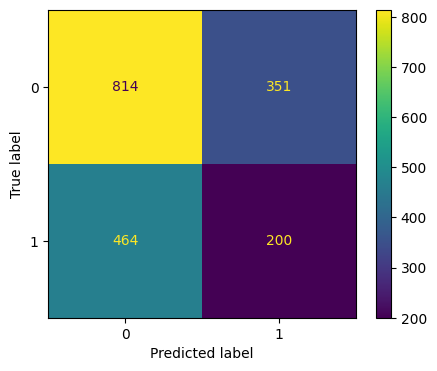

In [ ]:
# Display the confusion matrix using y_test and y_pred, the display lables are "Setosa,", "Versicolour", "Virginica".
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels = ["0", "1"])
cmp.plot(ax = ax);

In [ ]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1165
           1       0.00      0.00      0.00       664

    accuracy                           0.64      1829
   macro avg       0.32      0.50      0.39      1829
weighted avg       0.41      0.64      0.50      1829



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# # Load your dataset into a Pandas DataFrame
# data = pd.read_csv('your_dataset.csv')

# # Split your data into features and the target variable
# X = data.drop(columns=['Heart Attack Risk'])
# y = data['Heart Attack Risk']

# Define the hyperparameters and their respective values to be tuned
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest classifier
# rf_classifier = RandomForestClassifier()

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X, y)

# Print the best parameters and the corresponding accuracy score
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor